# **Apoiando a Área de Marketing da Empresa Melhores Compras com o Método Estatístico de Regressão Linear**

**Objetivo**


Com o objetivo de maximizar o retorno sobre investimento Return of Investment (ROI) em publicidade, a equipe de Marketing gostaria de explorar o uso do método estatístico de regressão linear, tendo ciência que esse método permite estabelecer uma relação matemática entre os gastos com publicidade em diversos canais, como redes sociais, Jornal, Rádio e TV, e as vendas geradas a partir dessas campanhas.

**Atributos**

* Ano: Essa coluna representa o ano em que foi realizada a publicidade em determinado tipo de mídia.
* Mes: Essa coluna representa o mês em que foi realizada a publicidade em determinado tipo de mídia.
* Tipo de midia: Essa coluna representa o tipo de mídia utilizado pela área comercial para fazer publicidade. Os possíveis valores são: Páginas web, Redes sociais, TV, Jornal, Revista e Rádio. Em 2024, a mídia Instagram foi criada separadamente para trazer mais visibilidade na análise dos dados.
* Gastos com Publicidade (em R$): Essa coluna representa o valor investido durante o mês e ano em determinado tipo de mídia.
* Previsão Inicial de Aumento de Vendas (em mil unidades): Essa coluna representa uma previsão do aumento de vendas esperado para um determinado produto após a realização do investimento em publicidade em um dado período de tempo. Nesse modelo, essa coluna representa o ROI (Return on Investment).

**Bibliotecas**

In [224]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## **Exploração dos Dados**

In [225]:
df = pd.read_csv('Gastos_Publicidade_MelhoresCompras.csv') # Download do arquivo
df.head() #Visualizando as 5 primeiras linhas

,Ano,Mes,Tipo de Midia,Gastos com Publicidade (em R$),Previsao Inicial de Aumento de Vendas (em mil unidades)
0,2022,1,Paginas web,87000,1000
1,2022,1,Redes sociais,120000,800
2,2022,1,TV,250000,1500
3,2022,1,Jornal,110000,730
4,2022,1,Revista,40000,360


## **Estrututa**

In [226]:
df.shape #Quantidade de linhas e colunas

(200, 5)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Ano                                                      200 non-null    int64 
 1   Mes                                                      200 non-null    int64 
 2   Tipo de Midia                                            200 non-null    object
 3   Gastos com Publicidade (em R$)                           200 non-null    object
 4   Previsao Inicial de Aumento de Vendas (em mil unidades)  200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


## **Limpeza dos Dados**

In [228]:
# Converte a variável 'Tipo de Midia' para dummy, gerando colunas com 0s e 1s
df = pd.get_dummies(df, columns=['Tipo de Midia'])

# Visualizando o resultado
df.head()

,Ano,Mes,Gastos com Publicidade (em R$),Previsao Inicial de Aumento de Vendas (em mil unidades),Tipo de Midia_Google,Tipo de Midia_Instagram,Tipo de Midia_Jornal,Tipo de Midia_Paginas web,Tipo de Midia_Radio,Tipo de Midia_Redes sociais,Tipo de Midia_Revista,Tipo de Midia_TV
0,2022,1,87000,1000,False,False,False,True,False,False,False,False
1,2022,1,120000,800,False,False,False,False,False,True,False,False
2,2022,1,250000,1500,False,False,False,False,False,False,False,True
3,2022,1,110000,730,False,False,True,False,False,False,False,False
4,2022,1,40000,360,False,False,False,False,False,False,True,False


In [229]:
# Converte a coluna 'Gastos com Publicidade (em R$)' para numeric
df['Gastos com Publicidade (em R$)'] = pd.to_numeric(df['Gastos com Publicidade (em R$)'], errors='coerce')

# 1. Isolar as colunas dummy de mídia
colunas_midia = [col for col in df.columns if 'Tipo de Midia_' in col]

# 2. Multiplicar cada coluna dummy pela coluna de gastos
for coluna in colunas_midia:
    # O nome da nova coluna será, por exemplo, 'Gasto_TV'
    novo_nome_coluna = 'Gasto_' + coluna.split('_')[-1]

    # Cria a nova coluna de gasto multiplicando a dummy (0 ou 1) pelo valor do gasto total
    df[novo_nome_coluna] = df[coluna] * df['Gastos com Publicidade (em R$)']

# 3. Limpeza do DataFrame
# Agora podemos remover a coluna de gastos original e as colunas dummy, pois elas foram substituídas
df_final = df.drop(columns=colunas_midia + ['Gastos com Publicidade (em R$)'])


# Visualizando o resultado da transformação
print("DataFrame Transformado:")
df_final.head()

DataFrame Transformado:


,Ano,Mes,Previsao Inicial de Aumento de Vendas (em mil unidades),Gasto_Google,Gasto_Instagram,Gasto_Jornal,Gasto_Paginas web,Gasto_Radio,Gasto_Redes sociais,Gasto_Revista,Gasto_TV
0,2022,1,1000,0.0,0.0,0.0,87000.0,0.0,0.0,0.0,0.0
1,2022,1,800,0.0,0.0,0.0,0.0,0.0,120000.0,0.0,0.0
2,2022,1,1500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000.0
3,2022,1,730,0.0,0.0,110000.0,0.0,0.0,0.0,0.0,0.0
4,2022,1,360,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0.0


In [230]:
# 1. Lista das colunas de gastos que queremos converter
# (Caso não tenha executado, esta linha recria a lista de features)
features = [col for col in df_final.columns if 'Gasto_' in col]

# 2. Convertendo todas essas colunas para o tipo float de uma vez
df_final[features] = df_final[features].astype(float)

# 3. Verificando o resultado
# O método .info() é perfeito para checar os tipos de dados (Dtype) de todas as colunas
print("--- Tipos de Dados Após a Conversão ---")
df_final.info()

--- Tipos de Dados Após a Conversão ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Ano                                                      200 non-null    int64  
 1   Mes                                                      200 non-null    int64  
 2   Previsao Inicial de Aumento de Vendas (em mil unidades)  200 non-null    int64  
 3   Gasto_Google                                             197 non-null    float64
 4   Gasto_Instagram                                          197 non-null    float64
 5   Gasto_Jornal                                             197 non-null    float64
 6   Gasto_Paginas web                                        197 non-null    float64
 7   Gasto_Radio                                              197 non-null    flo

**Matriz de Correlação**

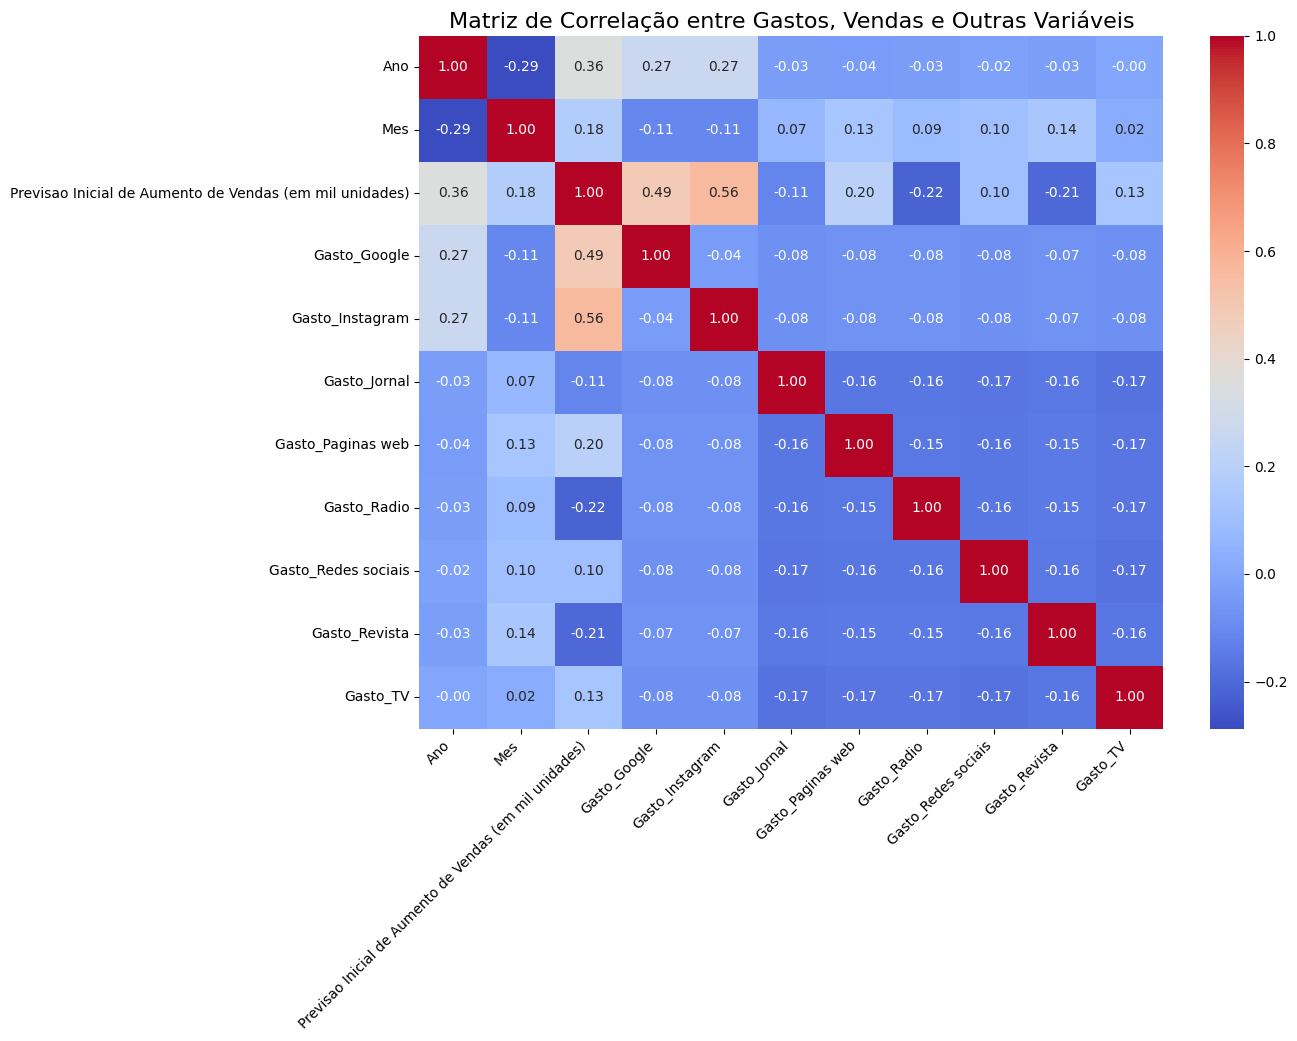

In [231]:
# 1. Calculando a matriz de correlação
# Vamos usar o DataFrame 'df_final' que contém todas as variáveis de gasto e a de vendas
corr_matrix = df_final.corr()

# 2. Criando o mapa de calor para visualizar a matriz
plt.figure(figsize=(12, 9)) # Define um bom tamanho para a figura
sns.heatmap(
    corr_matrix,
    annot=True, # Exibe os valores de correlação no mapa
    cmap='coolwarm', # Escolhe um esquema de cores intuitivo (quente para positivo, frio para negativo)
    fmt=".2f" # Formata os números para terem duas casas decimais
)
plt.title('Matriz de Correlação entre Gastos, Vendas e Outras Variáveis', fontsize=16)
plt.xticks(rotation=45, ha='right') # para nao sobrepor
plt.show()

**Gráfico de Disperção**

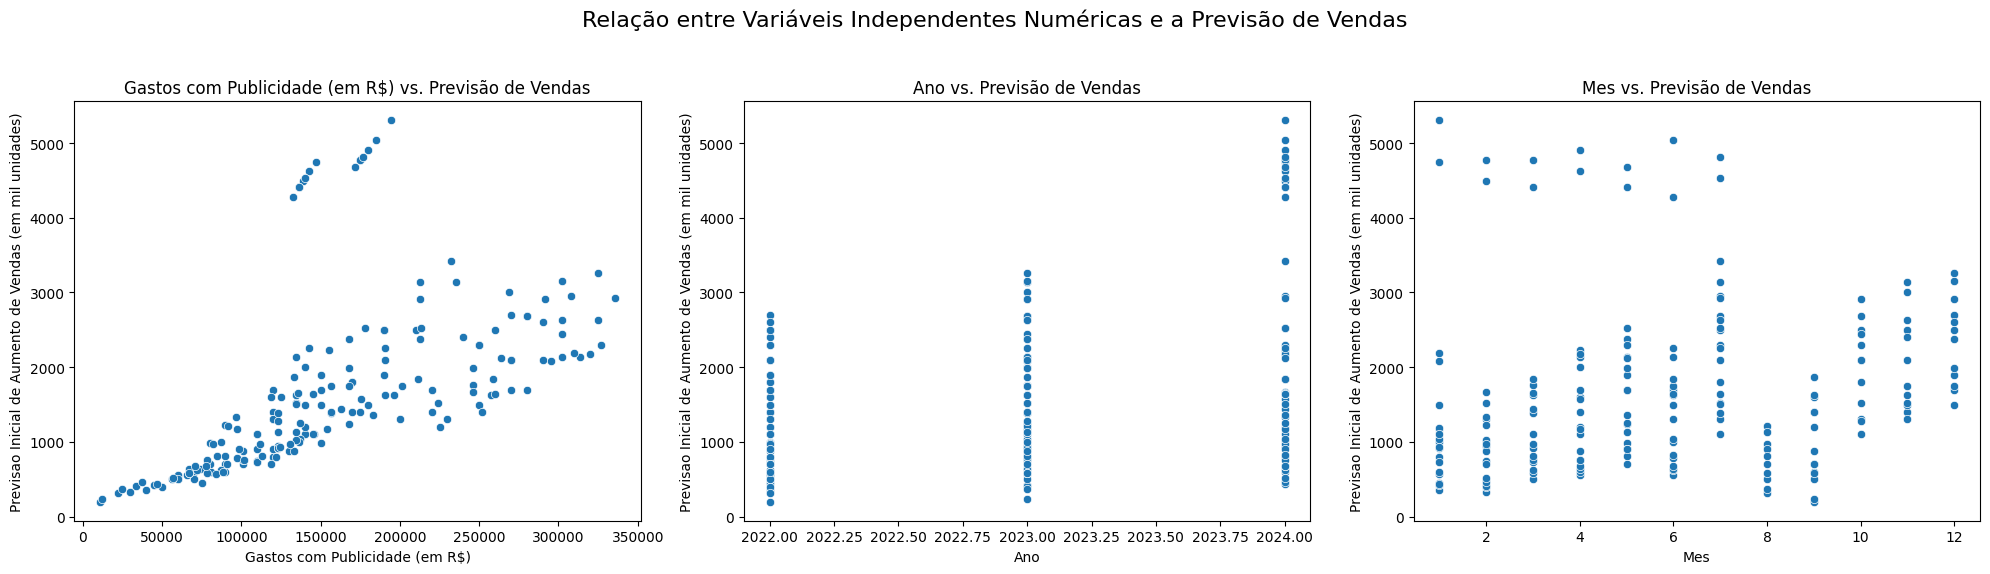

In [232]:
# Definindo a variável dependente e as independentes numéricas
variavel_dependente = 'Previsao Inicial de Aumento de Vendas (em mil unidades)'
variaveis_independentes_num = ['Gastos com Publicidade (em R$)', 'Ano', 'Mes']

# Criando a figura e os eixos (subplots) - 1 linha, 3 colunas
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Título geral
fig.suptitle('Relação entre Variáveis Independentes Numéricas e a Previsão de Vendas', fontsize=16)

# Criando um gráfico para cada variável independente
for i, var_ind in enumerate(variaveis_independentes_num):
    sns.scatterplot(data=df, x=var_ind, y=variavel_dependente, ax=axes[i])
    axes[i].set_title(f'{var_ind} vs. Previsão de Vendas')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta o layout para o título não sobrepor
plt.show()

Padrão/Tendência: Aqui vemos um padrão sazonal muito interessante. As previsões de vendas mais altas estão concentradas nos primeiros meses do ano (Janeiro a Março). Durante os meses do meio do ano (Maio a Setembro), as previsões são visivelmente mais baixas.

Outliers Relevantes: Existe um grupo distinto de campanhas com altíssima previsão de vendas (acima de 4.000) que ocorreram quase que exclusivamente no primeiro trimestre.

Insight Principal: A empresa parece ter um ciclo de vendas sazonal, com o início do ano sendo o período mais forte. Isso é crucial para o planejamento de marketing, sugerindo que os maiores investimentos devem ser concentrados nesse período.


Colunas de mídia encontradas com sucesso: 8 colunas.


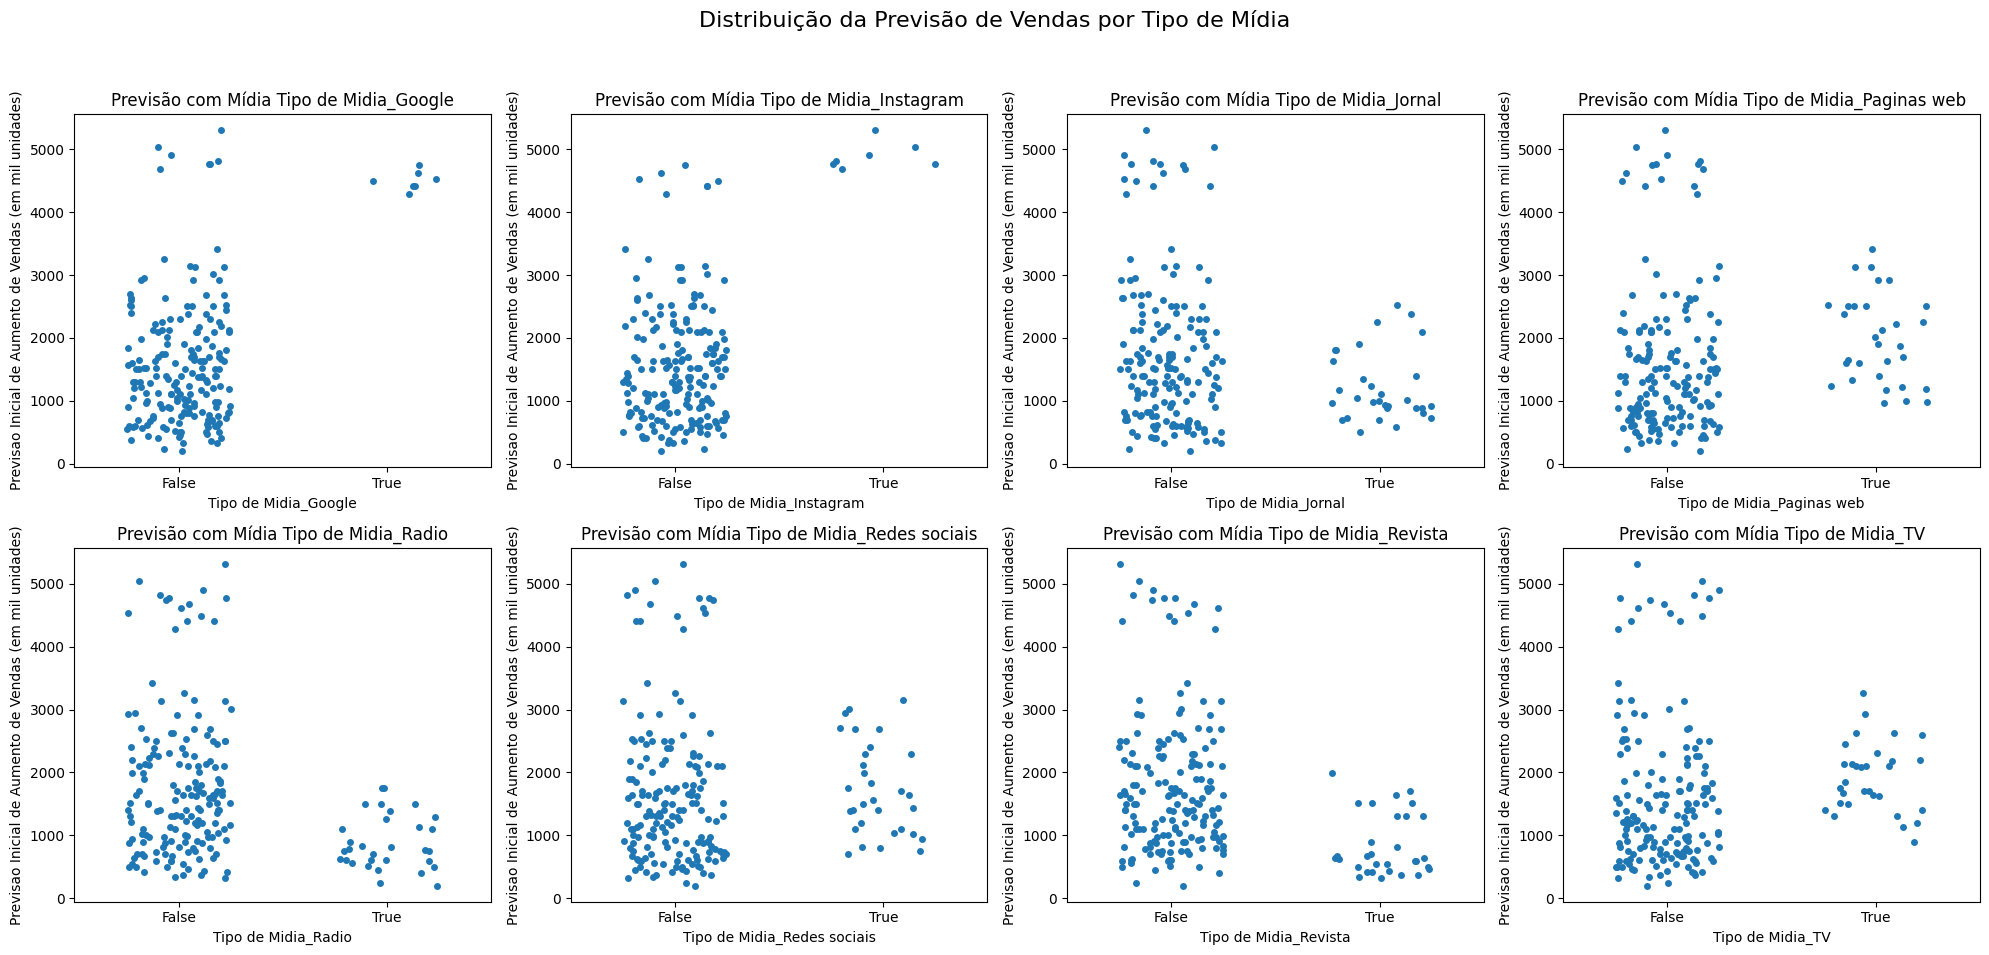

In [233]:
variaveis_midia = df.select_dtypes(include=['bool']).columns.tolist()

if not variaveis_midia:
    print("\nERRO: Nenhuma coluna do tipo 'bool' (Tipo de Mídia) foi encontrada.")
    print("Por favor, verifique os tipos de dados do seu DataFrame com o comando df.info()")
else:
    print(f"\nColunas de mídia encontradas com sucesso: {len(variaveis_midia)} colunas.")

    # Definindo a variável dependente
    variavel_dependente = 'Previsao Inicial de Aumento de Vendas (em mil unidades)'

    # Criando a figura e os eixos (subplots) - 2 linhas, 4 colunas
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten() # Transforma a matriz de eixos em uma lista para facilitar o loop

    fig.suptitle('Distribuição da Previsão de Vendas por Tipo de Mídia', fontsize=16)

    # Criando um gráfico para cada tipo de mídia encontrado
    for i, var_midia in enumerate(variaveis_midia):
        sns.stripplot(data=df, x=var_midia, y=variavel_dependente, ax=axes[i], jitter=0.25)

        # Tenta extrair um nome mais limpo para o título do gráfico
        nome_limpo = var_midia.replace("Tipo de Mídia ", "")
        axes[i].set_title(f'Previsão com Mídia {nome_limpo}')

    # Esta parte oculta os eixos que não foram usados (caso tenha menos de 8 mídias)
    for i in range(len(variaveis_midia), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Padrão Principal: O sucesso de uma campanha (medido pela previsão de vendas) é fortemente influenciado pelo valor investido, pela época do ano (início do ano é melhor) e, crucialmente, pelo canal de mídia escolhido.

Tendência de Investimento: Os dados sugerem uma estratégia clara: focar os maiores investimentos em Instagram, Google e TV, especialmente durante o primeiro trimestre do ano para maximizar o retorno.

Outliers a Serem Investigados: Seria interessante analisar as campanhas de baixo custo que tiveram um retorno previsto acima da média. Elas podem esconder uma estratégia muito eficiente. Da mesma forma, as campanhas de alto custo com baixo retorno precisam ser revistas para evitar desperdício de orçamento no futuro.

Reavaliação de Canais: O baixo desempenho associado a Jornal, Rádio e Revista indica que o investimento nesses canais deveria ser reavaliado ou possivelmente descontinuado, redirecionando o orçamento para os canais digitais que mostram um retorno muito superior.

## **Regressão Linear**

In [234]:
df_final.dropna(inplace=True) # Garantir que não temos dados faltantes que possam quebrar o modelo

# 1. Definindo as variáveis preditoras (X) e a variável alvo (y)
features = [col for col in df_final.columns if 'Gasto_' in col]
X = df_final[features]
y = df_final['Previsao Inicial de Aumento de Vendas (em mil unidades)']

# 2. Dividindo os dados em conjuntos de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Criando e Treinando o Modelo
print("--- Treinando o Modelo de Regressão Linear ---")
model = LinearRegression()
model.fit(X_train, y_train)
print("Modelo treinado com sucesso!\n")

# 4. Fazendo Previsões e Avaliando a Performance
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("--- Performance do Modelo ---")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}\n")

# 5. Analisando os Resultados de Negócio (ROI)
coeficientes_roi = pd.DataFrame(model.coef_, X.columns, columns=['Retorno por Real Gasto (em mil unidades de venda)'])
print("--- Análise de Retorno Sobre o Investimento (ROI) por Mídia ---")
print(coeficientes_roi.sort_values(by='Retorno por Real Gasto (em mil unidades de venda)', ascending=False))

--- Treinando o Modelo de Regressão Linear ---
Modelo treinado com sucesso!

--- Performance do Modelo ---
Coeficiente de Determinação (R²): 0.9586
Raiz do Erro Quadrático Médio (RMSE): 225.08

--- Análise de Retorno Sobre o Investimento (ROI) por Mídia ---
                     Retorno por Real Gasto (em mil unidades de venda)
Gasto_Google                                                  0.033650
Gasto_Instagram                                               0.028314
Gasto_Paginas web                                             0.013967
Gasto_Revista                                                 0.012363
Gasto_Radio                                                   0.011110
Gasto_Jornal                                                  0.010130
Gasto_Redes sociais                                           0.009799
Gasto_TV                                                      0.007787


# **Conclusão**

**Os dados apontam para uma clara distinção no desempenho dos canais. Com base nisso, recomendamos o seguinte plano de ação:**

* Ação 1: Acelerar nos Canais Campeões (Google e Instagram)
Estes canais são nossas "máquinas de vendas". Cada real investido aqui tem um retorno comprovado e superior. A recomendação é priorizar e, se possível, aumentar o orçamento destinado ao Google e Instagram, pois são os caminhos mais rápidos e eficientes para o crescimento.

* Ação 2: Otimizar os Canais de Bom Desempenho (Páginas Web e Revista)
Esses canais ainda geram um retorno positivo e contribuem para o resultado. O investimento neles é válido, mas devemos buscar otimizações. Podemos analisar quais portais ou revistas específicas trazem os melhores resultados para refinar ainda mais a alocação.

* Ação 3: Reavaliar Estrategicamente os Canais de Baixo Retorno (TV, Redes Sociais Genéricas, Jornal)
Os canais com o menor ROI, especialmente a TV, consomem um orçamento significativo para um retorno comparativamente baixo. Isso não significa eliminá-los, mas sim questionar sua função estratégica:

Investigação: Por que o retorno é baixo? O custo por anúncio é muito elevado? A criatividade não está conectando com o público?

Testes A/B: Podemos testar campanhas de menor custo ou mensagens diferentes para tentar melhorar o desempenho?

Realocação Inteligente: Considerar a redução progressiva do orçamento nesses canais e a realocação dessa verba para o Google e Instagram, medindo o impacto positivo no volume total de vendas.

Em suma, esta análise nos oferece a oportunidade de transformar nossa estratégia de marketing, tornando-a mais ágil, eficiente e, acima de tudo, lucrativa. Estamos agora equipados para investir nosso dinheiro onde ele comprovadamente funciona melhor.